In [318]:
import pandas as pd
import matplotlib.pyplot as plt

In [319]:
def read_dvsa1204(sheet_name):
    df_raw = pd.read_excel(r"C:\Users\cheny\OneDrive - Durham University\其他\UK Driving\dvsa1204.xlsx", sheet_name=sheet_name, header=None)
    df_raw.drop(df_raw.head(7).index,inplace=True)
    df_raw.dropna(axis=1, how='all') #列
    df_raw.columns = ["ethnicity","take","pass","r"]
    df_raw["ethnicity"]=df_raw["ethnicity"].astype(str)
    df_raw = df_raw.drop(df_raw[(df_raw['ethnicity'] != "Asian or Asian British") & (df_raw['ethnicity'] != "Chinese" ) & (df_raw['ethnicity'] != "Black or Black British" ) & (df_raw['ethnicity'] != "White" )& (df_raw['ethnicity'] != "Other" )& (df_raw['ethnicity'] != "Mixed" )& (df_raw['ethnicity'] != "No Preference Given" )& (df_raw['ethnicity'] != "Prefer not to say" )].index) 
    df_eth =df_raw.groupby('ethnicity').sum()
    df_eth= df_eth[["take","pass"]] 
    df_eth["r"] = 100* df_eth["pass"] /df_eth["take"] 
    df_eth["year"] =  sheet_name
    return df_eth

In [320]:
merge_file = []
for i in ["2018-19","2017-18","2016-17","2015-16","2014-15","2013-14","2012-13","2011-12","2010-11","2009-10","2008-09","2007-08"]:    
    table = read_dvsa1204(i)
    merge_file.append(table) 
    
result = pd.concat(merge_file)

In [321]:
result.to_csv("result.csv")

In [322]:
result["year"]=result["year"].astype(str)

In [323]:
result["Year"]=result["year"].str.slice(0,4)

In [324]:
result["Year"]=result["Year"].astype(int)

In [325]:
result['ethnicity']= result.index

In [326]:
result["ethnicity"]=result["ethnicity"].astype(str)

In [327]:
result

,take,pass,r,year,Year,ethnicity
ethnicity,,,,,,
Asian or Asian British,29945,10356,34.583403,2018-19,2018,Asian or Asian British
Black or Black British,19148,6255,32.666597,2018-19,2018,Black or Black British
Chinese,2143,827,38.590761,2018-19,2018,Chinese
Mixed,5864,2502,42.667121,2018-19,2018,Mixed
No Preference Given,1507477,694926,46.098614,2018-19,2018,No Preference Given
...,...,...,...,...,...,...
Mixed,16276,7162,44.003441,2007-08,2007,Mixed
No Preference Given,1038182,450454,43.388731,2007-08,2007,No Preference Given
Other,19785,7327,37.033106,2007-08,2007,Other


In [328]:
result.loc[result["ethnicity"]=="Chinese", (["r","Year"])]

,r,Year
ethnicity,,
Chinese,38.590761,2018
Chinese,39.344262,2017
Chinese,38.366197,2016
Chinese,37.745657,2015
Chinese,36.361027,2014
Chinese,37.595107,2013
Chinese,38.093544,2012
Chinese,39.444649,2011
Chinese,38.312059,2010


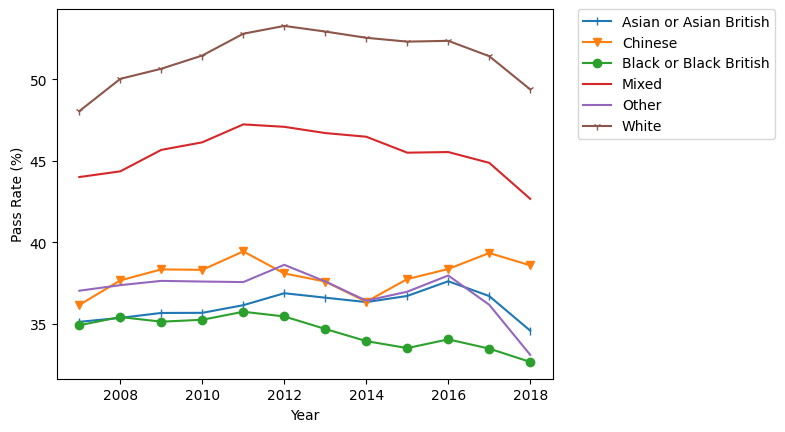

In [340]:
plt.xlabel('Year') #设置x轴名称 x label
plt.ylabel('Pass Rate (%)') #设置y轴名称 y label
plt.plot(result.loc[result["ethnicity"]=="Asian or Asian British", (["Year"])],result.loc[result["ethnicity"]=="Asian or Asian British", (["r"])],label='Asian or Asian British' ,marker='|' )
plt.plot(result.loc[result["ethnicity"]=="Chinese", (["Year"])],result.loc[result["ethnicity"]=="Chinese", (["r"])],label='Chinese',marker='v')
plt.plot(result.loc[result["ethnicity"]=="Black or Black British", (["Year"])],result.loc[result["ethnicity"]=="Black or Black British", (["r"])],label='Black or Black British',marker='o')
plt.plot(result.loc[result["ethnicity"]=="Mixed", (["Year"])],result.loc[result["ethnicity"]=="Mixed", (["r"])],label='Mixed')
plt.plot(result.loc[result["ethnicity"]=="Other", (["Year"])],result.loc[result["ethnicity"]=="Other", (["r"])],label='Other')
plt.plot(result.loc[result["ethnicity"]=="White", (["Year"])],result.loc[result["ethnicity"]=="White", (["r"])],label='White',marker='1')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)
plt.savefig('num_people.png', dpi=500, bbox_inches='tight')
plt.show()